In [17]:
pip install --user missingno

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import missingno as msno

In [11]:
df=pd.read_csv("Richard Osman's House of Games - Episode Guide - Players.csv")

In [6]:
df.columns.values

array(['Player', 'Ser.', 'Wk.', 'Seat', 'M', 'T', 'W', 'T.1', 'F',
       'Total', 'Avg', 'Rate*', 'M.1', 'T.2', 'W.1', 'T.3', 'F.1', '1st',
       '2nd', '3rd', '4th', 'Week', 'Week.1',
       '*Scoring Rate = % of Total Daily Points Scored Across Week',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Ser..1', 'Wk..1',
       '4-Player Total'], dtype=object)

In [8]:
df.shape

(303, 30)

### See missing entries

<AxesSubplot:>

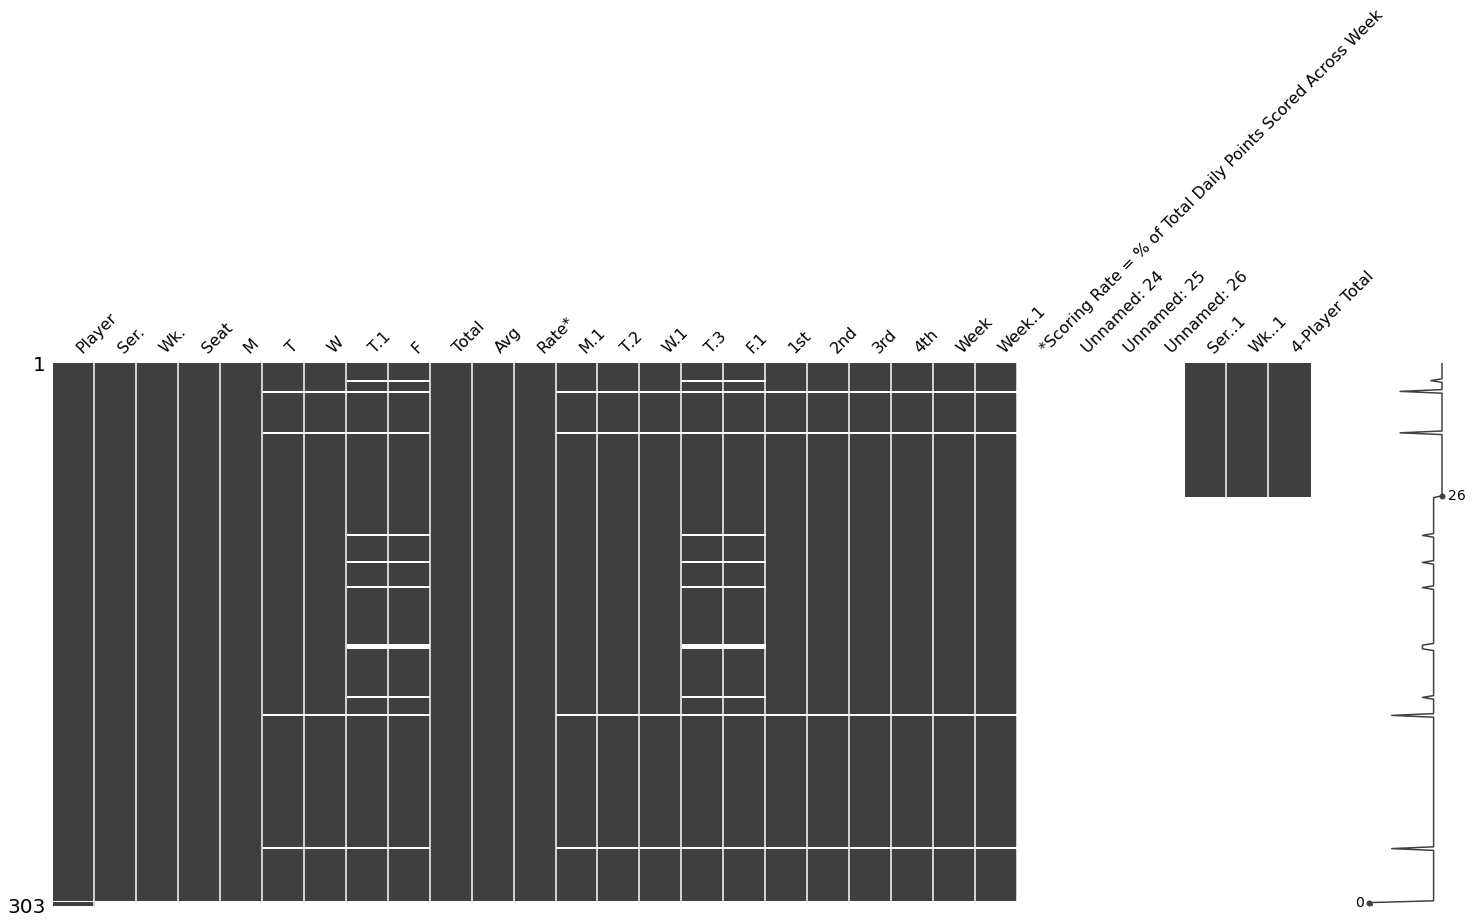

In [19]:
msno.matrix(df)

In [14]:
df.head()

,Player,Ser.,Wk.,Seat,M,T,W,T.1,F,Total,...,4th,Week,Week.1,*Scoring Rate = % of Total Daily Points Scored Across Week,Unnamed: 24,Unnamed: 25,Unnamed: 26,Ser..1,Wk..1,4-Player Total
0,Angela Barnes,4,6.0,4.0,15.0,14.0,14.0,20.0,19.0,82.0,...,0.0,24.0,1st,NaN,NaN,NaN,NaN,2,2.0,167.0
1,Ed Gamble,3,1.0,2.0,16.0,11.0,10.0,14.0,12.0,63.0,...,0.0,23.0,1st,NaN,NaN,NaN,NaN,3,20.0,165.0
2,Simon Hickson,5,16.0,4.0,12.0,15.0,6.0,14.0,15.0,62.0,...,0.0,23.0,1st,NaN,NaN,NaN,NaN,2,5.0,164.0
3,Steve Pemberton,2,2.0,2.0,12.0,11.0,15.0,14.0,8.0,60.0,...,0.0,22.0,1st,NaN,NaN,NaN,NaN,5,6.0,162.0
4,Shaun Williamson,4,20.0,4.0,14.0,13.0,10.0,11.0,11.0,59.0,...,0.0,23.0,1st,NaN,NaN,NaN,NaN,5,14.0,160.0


In [13]:
df['Ser.'].unique()

array(['4', '3', '5', '2', 'N2', '1', 'N1', nan], dtype=object)

### Rename columns

In [23]:
df.rename(columns={'Ser.':'Series', 'Wk.':'Week', 'T':'Tu', 'T.1':'Th', 'Total':'Score', 'Week':'Points', 'Week.1':'Rank'}, inplace=True)

In [24]:
df.head()

,Player,Series,Week,Seat,M,Tu,W,Th,F,Score,...,4th,Points,Rank,*Scoring Rate = % of Total Daily Points Scored Across Week,Unnamed: 24,Unnamed: 25,Unnamed: 26,Ser..1,Wk..1,4-Player Total
0,Angela Barnes,4,6.0,4.0,15.0,14.0,14.0,20.0,19.0,82.0,...,0.0,24.0,1st,NaN,NaN,NaN,NaN,2,2.0,167.0
1,Ed Gamble,3,1.0,2.0,16.0,11.0,10.0,14.0,12.0,63.0,...,0.0,23.0,1st,NaN,NaN,NaN,NaN,3,20.0,165.0
2,Simon Hickson,5,16.0,4.0,12.0,15.0,6.0,14.0,15.0,62.0,...,0.0,23.0,1st,NaN,NaN,NaN,NaN,2,5.0,164.0
3,Steve Pemberton,2,2.0,2.0,12.0,11.0,15.0,14.0,8.0,60.0,...,0.0,22.0,1st,NaN,NaN,NaN,NaN,5,6.0,162.0
4,Shaun Williamson,4,20.0,4.0,14.0,13.0,10.0,11.0,11.0,59.0,...,0.0,23.0,1st,NaN,NaN,NaN,NaN,5,14.0,160.0


### Keep necessary columns

In [25]:
df_new=df[['Series', 'Week', 'Player', 'M', 'Tu', 'W', 'Th', 'F', 'Score', 'Points', 'Rank']]

In [31]:
df_new=df_new.convert_dtypes()

In [37]:
df_new.head()

,Series,Week,Player,M,Tu,W,Th,F,Score,Points,Rank
0,4,6,Angela Barnes,15,14,14,20,19,82,24,1st
1,3,1,Ed Gamble,16,11,10,14,12,63,23,1st
2,5,16,Simon Hickson,12,15,6,14,15,62,23,1st
3,2,2,Steve Pemberton,12,11,15,14,8,60,22,1st
4,4,20,Shaun Williamson,14,13,10,11,11,59,23,1st


In [35]:
df_new.dtypes

Series    string
Week       Int64
Player    string
M          Int64
Tu         Int64
W          Int64
Th         Int64
F          Int64
Score      Int64
Points     Int64
Rank      string
dtype: object

In [36]:
df_new.Rank.unique()

<StringArray>
['1st', <NA>, '2nd', '3rd', '4th']
Length: 5, dtype: string

<AxesSubplot:>

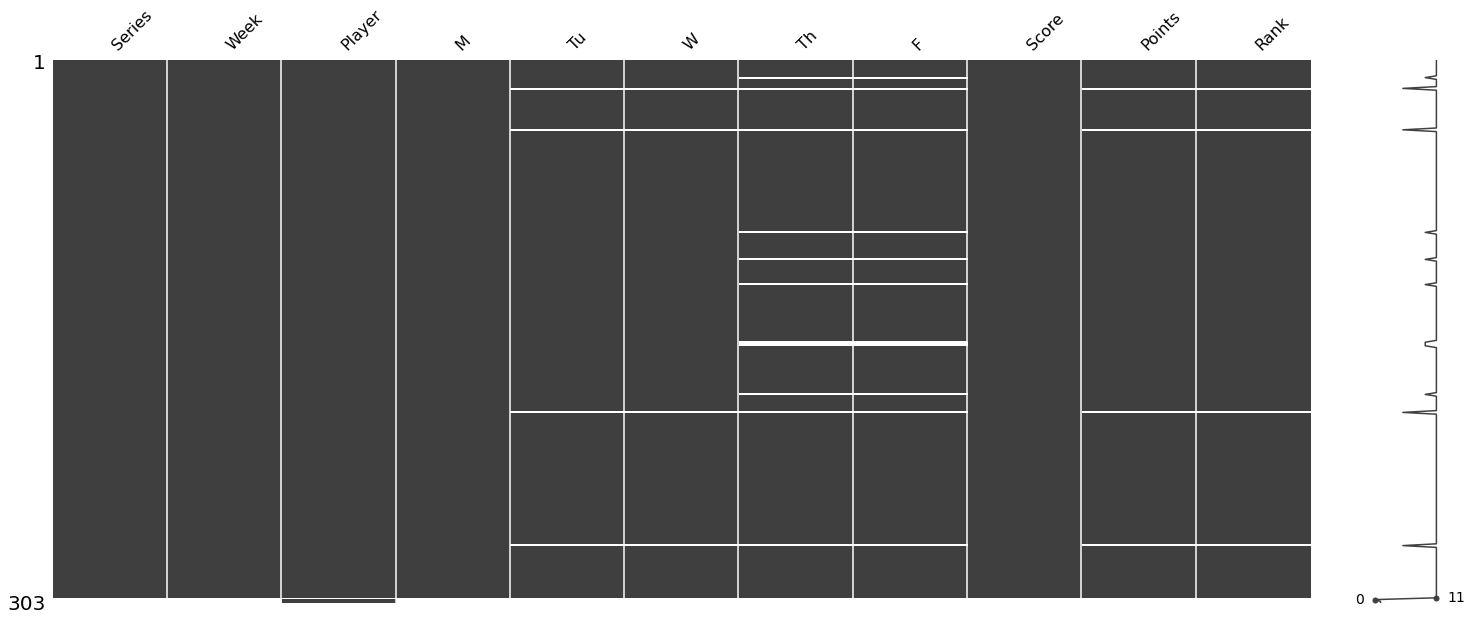

In [32]:
msno.matrix(df_new)

### Check if there are duplicated rows

In [43]:
df_new.duplicated(['Series', 'Week', 'Player']).sum()

0

### Convert Series to Numeric

In [39]:
df_new.Series.value_counts(dropna=False)

4      80
3      80
5      72
2      40
1      12
N2      8
N1      8
NaN     3
Name: Series, dtype: Int64

In [102]:
# df_new.Series.replace(['N1','N2'], np.nan).value_counts(dropna=False)

In [93]:
df_new['Series']=pd.to_numeric(df_new.Series, errors='coerce')

### Delete rows with Null Series

In [94]:
df_new1=df_new[df_new['Series'].notna()].sort_values(by=['Series','Week', 'Rank'])

In [95]:
df_new1.Series.value_counts(dropna=False)

3.0    80
4.0    80
5.0    72
2.0    40
1.0    12
Name: Series, dtype: int64

In [96]:
df_new1['Series']=df_new1['Series'].astype(int)

In [97]:
df_new1.shape

(284, 11)

In [98]:
df_new1.head()

,Series,Week,Player,M,Tu,W,Th,F,Score,Points,Rank
31,1,1,Nish Kumar,10,12,13,8,8,51,23,1st
46,1,1,Al Murray,13,11,10,7,6,47,17,2nd
126,1,1,Clara Amfo,9,9,4,6,8,36,13,3rd
227,1,1,Anneka Rice,6,4,7,4,4,25,7,4th
48,1,2,Rick Edwards,11,10,6,9,11,47,21,1st


### Points without double points Friday

In [180]:
df_new1.groupby(['Series', 'Week'])['F'].rank(method='first', ascending=False)

31     1.0
46     3.0
126    2.0
227    4.0
48     1.0
      ... 
288    4.0
6      1.0
81     2.0
192    3.0
292    4.0
Name: F, Length: 284, dtype: float64

In [110]:
df_new1['Points without double points Friday']= df_new1.Points- (5-df_new1.groupby(['Series', 'Week'])['F'].rank(method='first', ascending=False))

### Score if double score Friday

In [111]:
df_new1['Score if double score Friday']= df_new1.F + df_new1.Score

### Rank without double points Friday

In [162]:
df_new1['Rank without double points Friday']=df_new1.groupby(['Series', 'Week'])['Points without double points Friday'].rank(method='min', ascending=False).astype(int)

### Rank based on Score

In [164]:
df_new1['Rank based on Score']=df_new1.groupby(['Series', 'Week'])['Score'].rank(method='min', ascending=False).astype(int)

### Rank if Double Score Friday

In [167]:
df_new1['Rank if Double Score Friday']=df_new1.groupby(['Series', 'Week'])['Score if double score Friday'].rank(method='min', ascending=False).astype(int)

In [172]:
# df_new1.loc[(df_new1.Series==3) & (df_new1.Week==2)]

### Change in winner with no double points Friday?

In [142]:
# extract first letter and change it to int type
df_new1.Rank=df_new1.Rank.str[0].astype(int)

In [173]:
df_new1['Change in winner with no double points Friday?']=df_new1.Rank!=df_new1['Rank without double points Friday']

### Change in winner based on Score?

In [174]:
df_new1['Change in winner based on Score?']=df_new1.Rank!=df_new1['Rank based on Score']

### Change in winner if Double Score Friday?

In [175]:
df_new1['Change in winner if Double Score Friday?']=df_new1.Rank!=df_new1['Rank if Double Score Friday']

### Output 

In [177]:
df_output=df_new1.drop(columns=['M', 'Tu', 'W', 'Th', 'F'])

In [178]:
df_output.head()

,Series,Week,Player,Score,Points,Rank,Points without double points Friday,Score if double score Friday,Rank without double points Friday,Rank based on Score,Rank if Double Score Friday,Change in winner with no double points Friday?,Change in winner based on Score?,Change in winner if Double Score Friday?
31,1,1,Nish Kumar,51,23,1,19.0,59,1,1,1,False,False,False
46,1,1,Al Murray,47,17,2,15.0,53,2,2,2,False,False,False
126,1,1,Clara Amfo,36,13,3,10.0,44,3,3,3,False,False,False
227,1,1,Anneka Rice,25,7,4,6.0,29,4,4,4,False,False,False
48,1,2,Rick Edwards,47,21,1,17.0,58,1,1,1,False,False,False


In [179]:
df_output.to_csv('Output.csv', index=False)

In [187]:
# test rank
# s=pd.Series([1,2,3,3,3,4,5]).rank(method='max')
# s.name='order'
# s